In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import plot_model


In [4]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = load_data()

In [5]:
# Reshape the training and testing data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))


In [7]:
# Normalize the values of pixels of images to improve the performance of the model
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

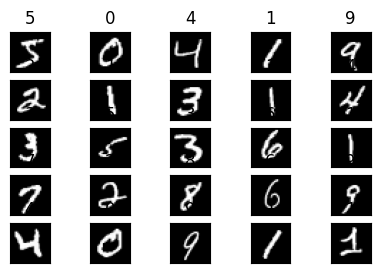

In [9]:
# Visualize the images
fig = plt.figure(figsize=(5, 3))
for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    # ax.imshow(np.squeeze(X_train[i]), cmap="gray")
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(str(y_train[i]))
plt.show();

In [10]:
# Check the shape
img_shape = X_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [14]:
# Defining the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=img_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [15]:
# Summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       600,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,702 (2.36 MB)

 Trainable params: 619,702 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

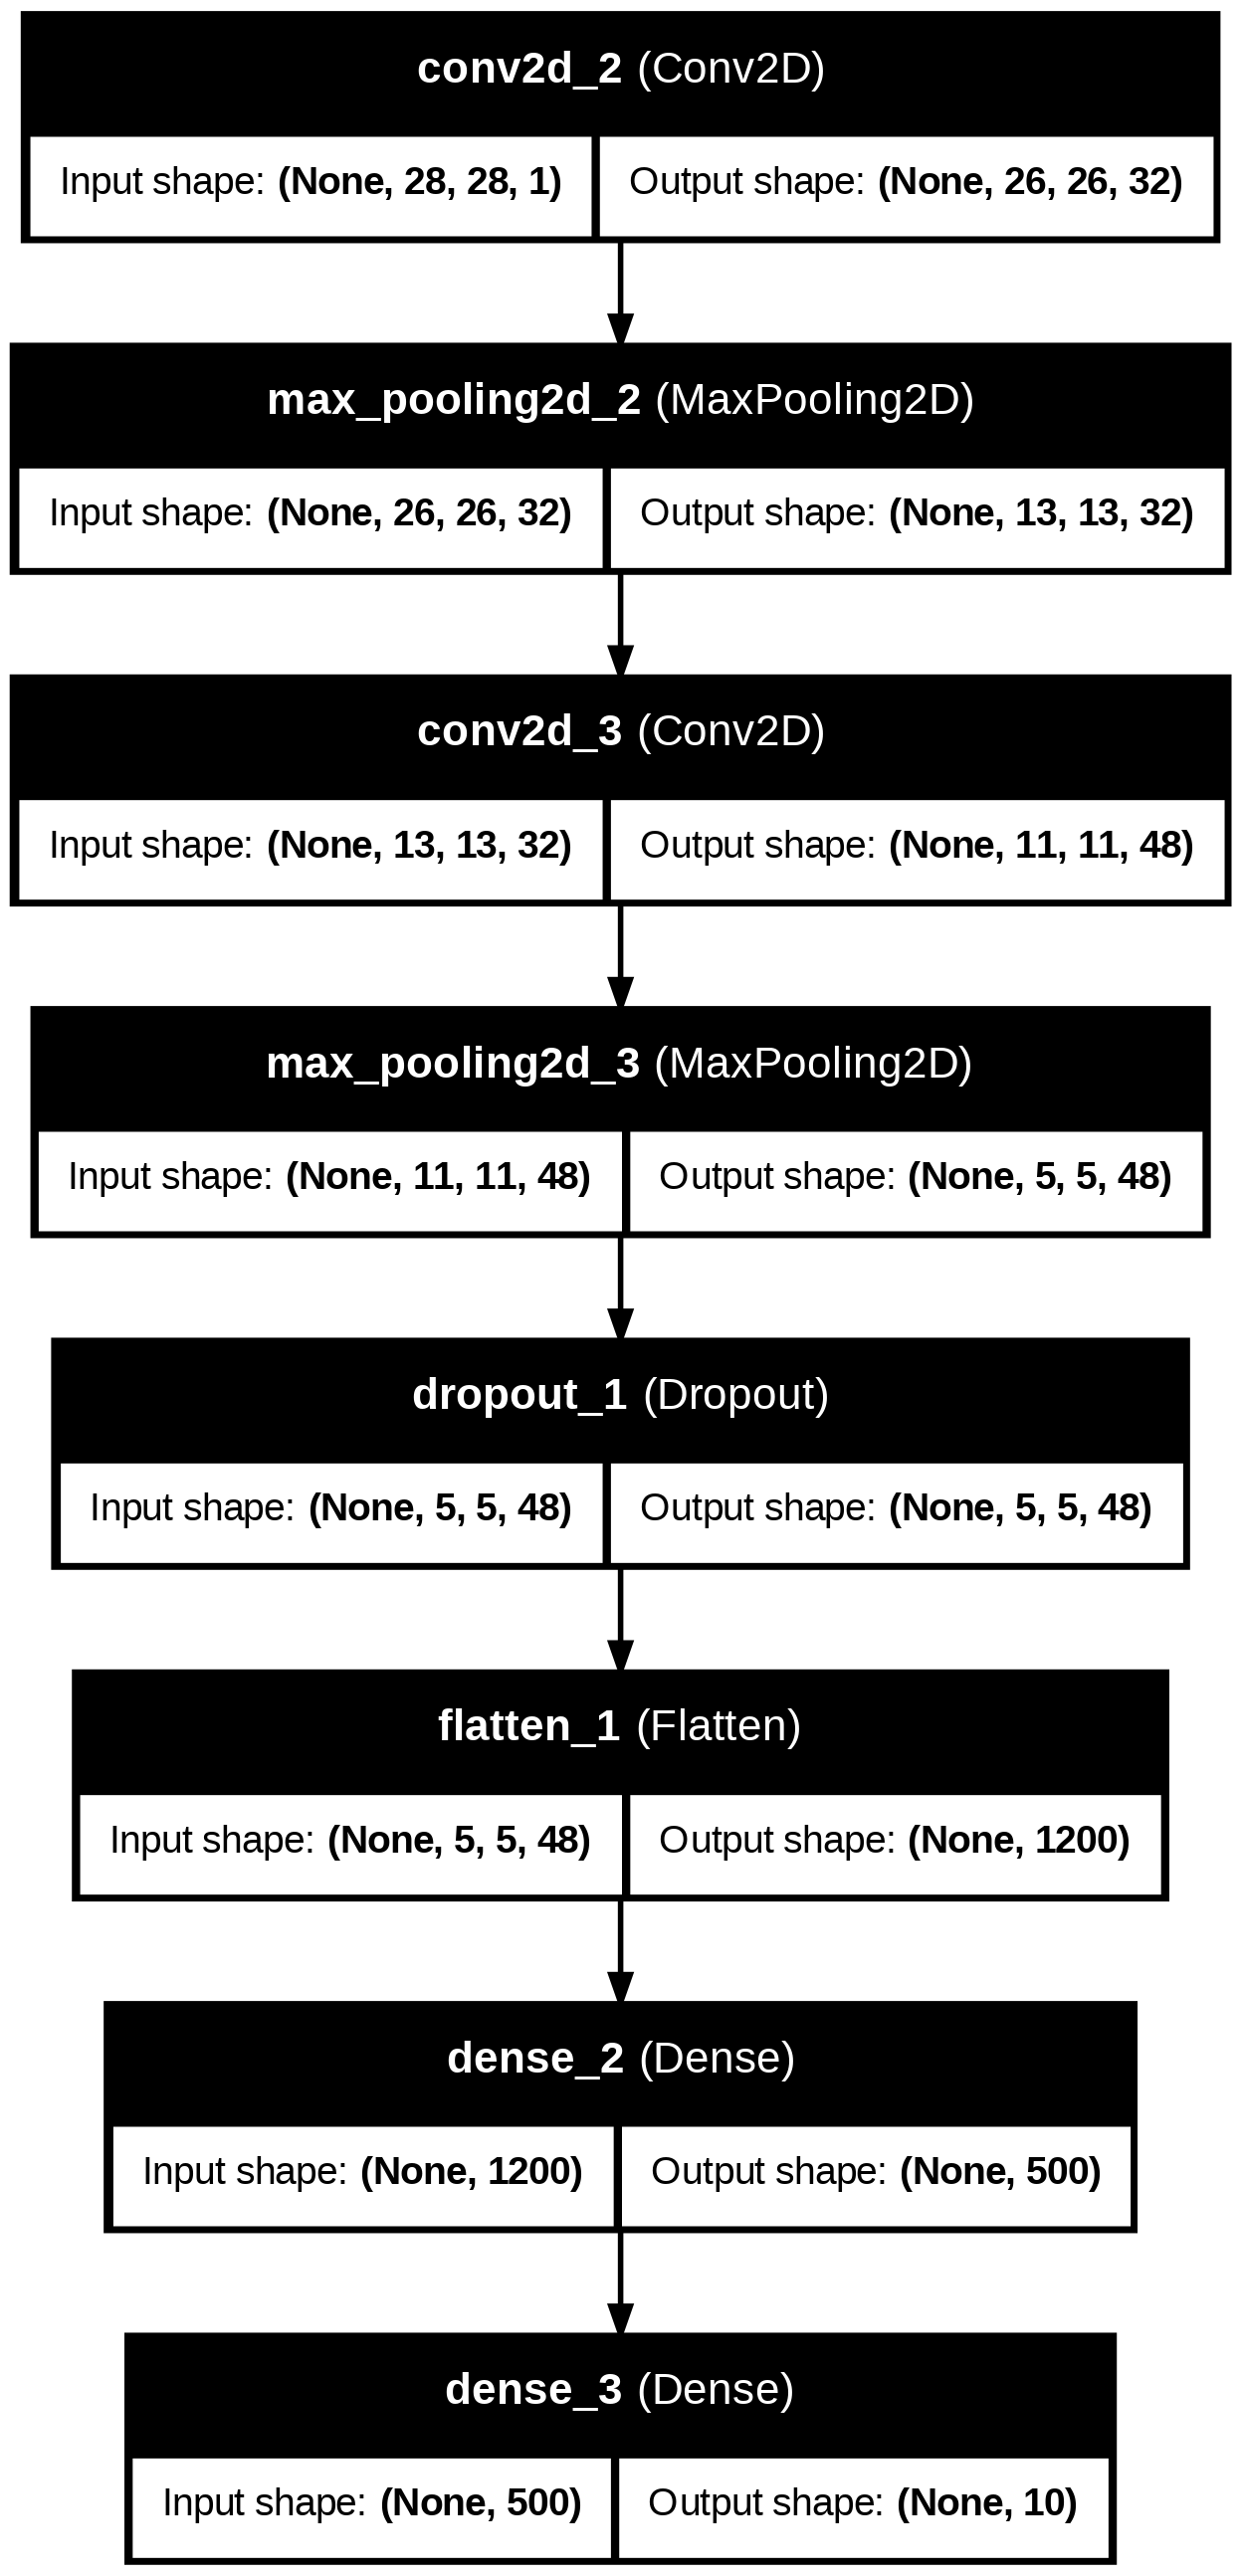

In [16]:
# Visualize the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [17]:
# Train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

X = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - accuracy: 0.7842 - loss: 0.6877 - val_accuracy: 0.9703 - val_loss: 0.0969
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9647 - loss: 0.1137 - val_accuracy: 0.9812 - val_loss: 0.0601
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9774 - loss: 0.0718 - val_accuracy: 0.9825 - val_loss: 0.0544
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9817 - loss: 0.0578 - val_accuracy: 0.9840 - val_loss: 0.0486
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9850 - loss: 0.0467 - val_accuracy: 0.9872 - val_loss: 0.0384
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.9889 - loss: 0.0357 - val_accuracy: 0.9876 - val_loss: 0.0372
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9897 - loss: 0.0339 - val_accuracy: 0.9871 - val_loss: 0.0359
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9915 -

In [18]:
# Test the accuracy of the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.04384715110063553
Test accuracy: 0.9865000247955322


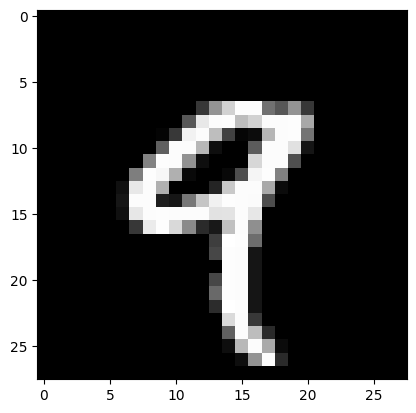

In [23]:
# Verify the prediction of the model
image = X_train[4]

# Display the image
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.show();

In [24]:
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
pred = model.predict(image)
print("Predicted: {}".format(argmax(pred)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted: 9
